# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,50.22
1,NaN,"Jan 02, 1979",1979/01/02,29.53
2,NaN,"Jan 03, 1979",1979/01/03,24.08
3,NaN,"Jan 04, 1979",1979/01/04,32.87
4,NaN,"Jan 05, 1979",1979/01/05,32.16
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,45.33
12050,NaN,"Dec 29, 2011",2011/12/29,52.86
12051,NaN,"Dec 30, 2011",2011/12/30,59.54
12052,NaN,"Dec 31, 2011",2011/12/31,55.81


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df.Notes != 'Total']
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,50.22
1,NaN,"Jan 02, 1979",1979/01/02,29.53
2,NaN,"Jan 03, 1979",1979/01/03,24.08
3,NaN,"Jan 04, 1979",1979/01/04,32.87
4,NaN,"Jan 05, 1979",1979/01/05,32.16
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,45.49
12049,NaN,"Dec 28, 2011",2011/12/28,45.33
12050,NaN,"Dec 29, 2011",2011/12/29,52.86
12051,NaN,"Dec 30, 2011",2011/12/30,59.54


In [5]:
df = df.drop(columns=['Notes'])
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,50.22
1,"Jan 02, 1979",1979/01/02,29.53
2,"Jan 03, 1979",1979/01/03,24.08
3,"Jan 04, 1979",1979/01/04,32.87
4,"Jan 05, 1979",1979/01/05,32.16
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,45.49
12049,"Dec 28, 2011",2011/12/28,45.33
12050,"Dec 29, 2011",2011/12/29,52.86
12051,"Dec 30, 2011",2011/12/30,59.54


>3) Make a column called Date that is in the pandas datetime format

In [6]:
df['Date'] = pd.to_datetime(df['Month Day, Year Code'])
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",1979/01/01,50.22,1979-01-01
1,"Jan 02, 1979",1979/01/02,29.53,1979-01-02
2,"Jan 03, 1979",1979/01/03,24.08,1979-01-03
3,"Jan 04, 1979",1979/01/04,32.87,1979-01-04
4,"Jan 05, 1979",1979/01/05,32.16,1979-01-05
...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,45.49,2011-12-27
12049,"Dec 28, 2011",2011/12/28,45.33,2011-12-28
12050,"Dec 29, 2011",2011/12/29,52.86,2011-12-29
12051,"Dec 30, 2011",2011/12/30,59.54,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
#df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,"Jan 01, 1979",1979/01/01,50.22,1979-01-01,1979,1,1
1,"Jan 02, 1979",1979/01/02,29.53,1979-01-02,1979,1,2
2,"Jan 03, 1979",1979/01/03,24.08,1979-01-03,1979,1,3
3,"Jan 04, 1979",1979/01/04,32.87,1979-01-04,1979,1,4
4,"Jan 05, 1979",1979/01/05,32.16,1979-01-05,1979,1,5
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,45.49,2011-12-27,2011,12,27
12049,"Dec 28, 2011",2011/12/28,45.33,2011-12-28,2011,12,28
12050,"Dec 29, 2011",2011/12/29,52.86,2011-12-29,2011,12,29
12051,"Dec 30, 2011",2011/12/30,59.54,2011-12-30,2011,12,30


In [8]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

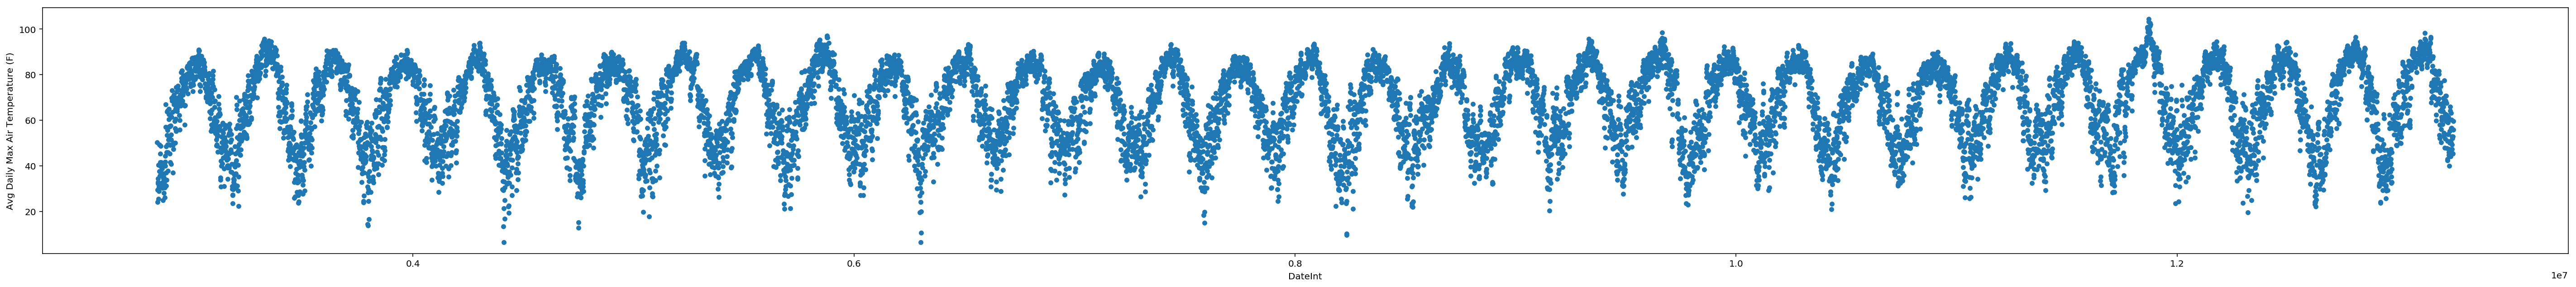

In [9]:
df.plot.scatter(x = 'DateInt', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5));

>5) Describe your plot.

It shows the change in temperature in Tennessee for a period of over 30 years. It shows the rise and fall in temperature each year as the state goes through the seasons

### Adding colors for our graph

In [10]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

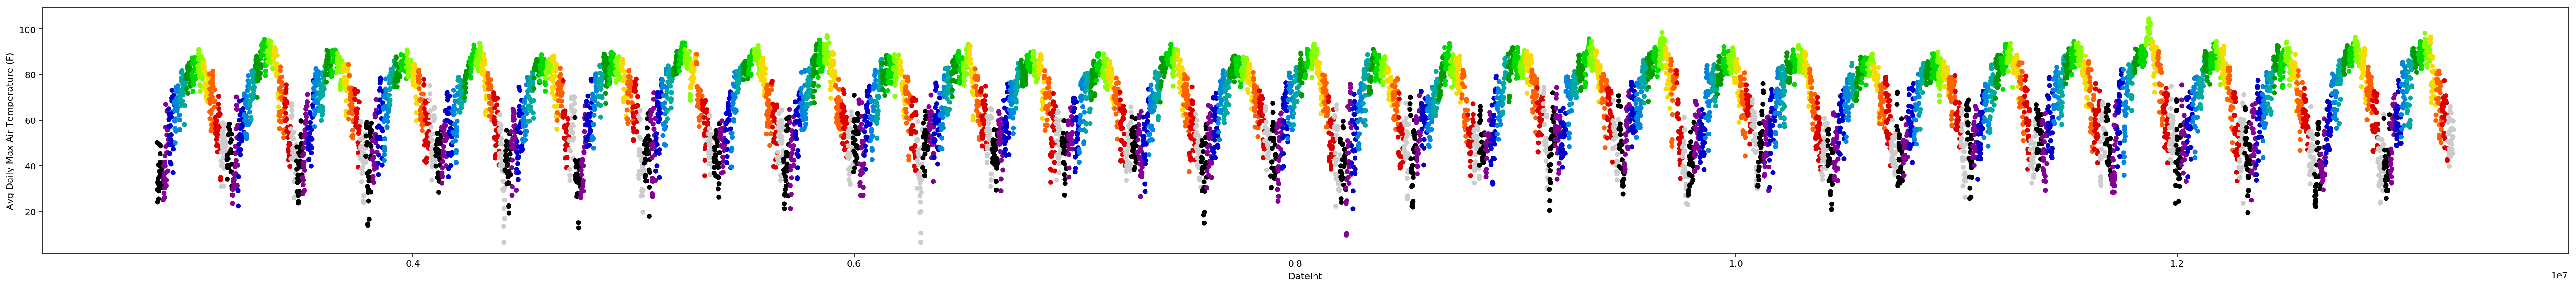

In [11]:
df.plot.scatter(x = 'DateInt', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5), c=df['color']);

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [12]:
df6m = df[(df['Date'] > '2000-01-01') & (df['Date'] <= '2000-07-01')]
df6m

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
7671,"Jan 02, 2000",2000/01/02,70.76,2000-01-02,2000,1,2,9467712.0,#000000
7672,"Jan 03, 2000",2000/01/03,68.52,2000-01-03,2000,1,3,9468576.0,#000000
7673,"Jan 04, 2000",2000/01/04,56.20,2000-01-04,2000,1,4,9469440.0,#000000
7674,"Jan 05, 2000",2000/01/05,39.79,2000-01-05,2000,1,5,9470304.0,#000000
7675,"Jan 06, 2000",2000/01/06,47.66,2000-01-06,2000,1,6,9471168.0,#000000
...,...,...,...,...,...,...,...,...,...
7848,"Jun 27, 2000",2000/06/27,81.67,2000-06-27,2000,6,27,9620640.0,#009c00
7849,"Jun 28, 2000",2000/06/28,79.86,2000-06-28,2000,6,28,9621504.0,#009c00
7850,"Jun 29, 2000",2000/06/29,80.24,2000-06-29,2000,6,29,9622368.0,#009c00
7851,"Jun 30, 2000",2000/06/30,81.79,2000-06-30,2000,6,30,9623232.0,#009c00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

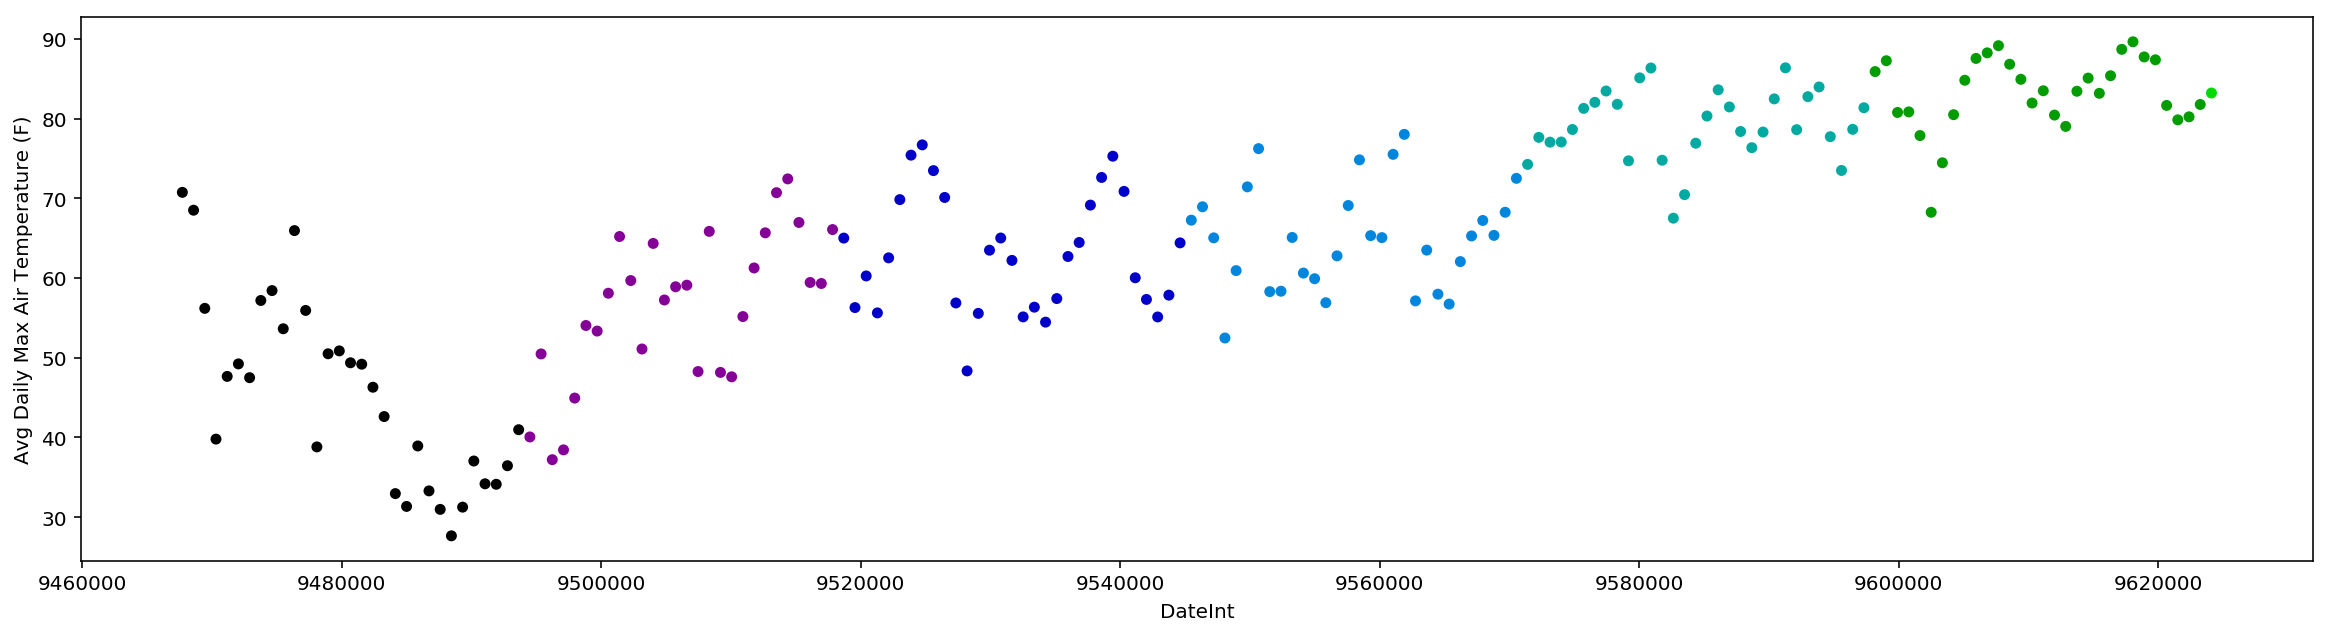

In [13]:
df6m.plot.scatter(x = 'DateInt', y = 'Avg Daily Max Air Temperature (F)', figsize=(20,5), c=df['color']);

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [14]:
X=df6m['DateInt'].values
Y=df6m['Avg Daily Max Air Temperature (F)'].values

In [15]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [16]:
Y_pred = lin_reg(X,Y)

0.0002754488077092461 -2563.918809372857


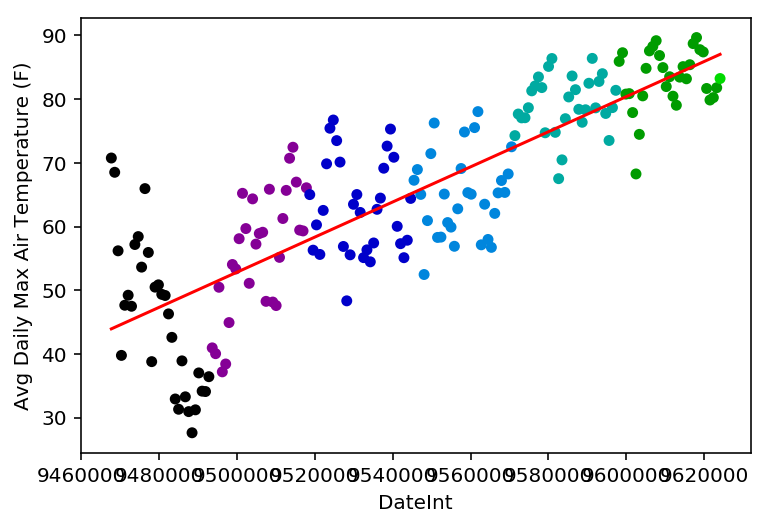

In [17]:
df6m.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',c=df6m['color'])
plt.plot([min(df6m['DateInt'].values), max(df6m['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [18]:
#slope: 0.0002754488077092461 
#y-intercept: -2563.918809372857

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [19]:
#the minimum is 43.95 degrees F
Y_pred.min()

43.951172761664566

In [20]:
#the maximum is 87.03 degrees F
Y_pred.max()

87.02695910646707

In [21]:
#the slope is positive.

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [22]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [23]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

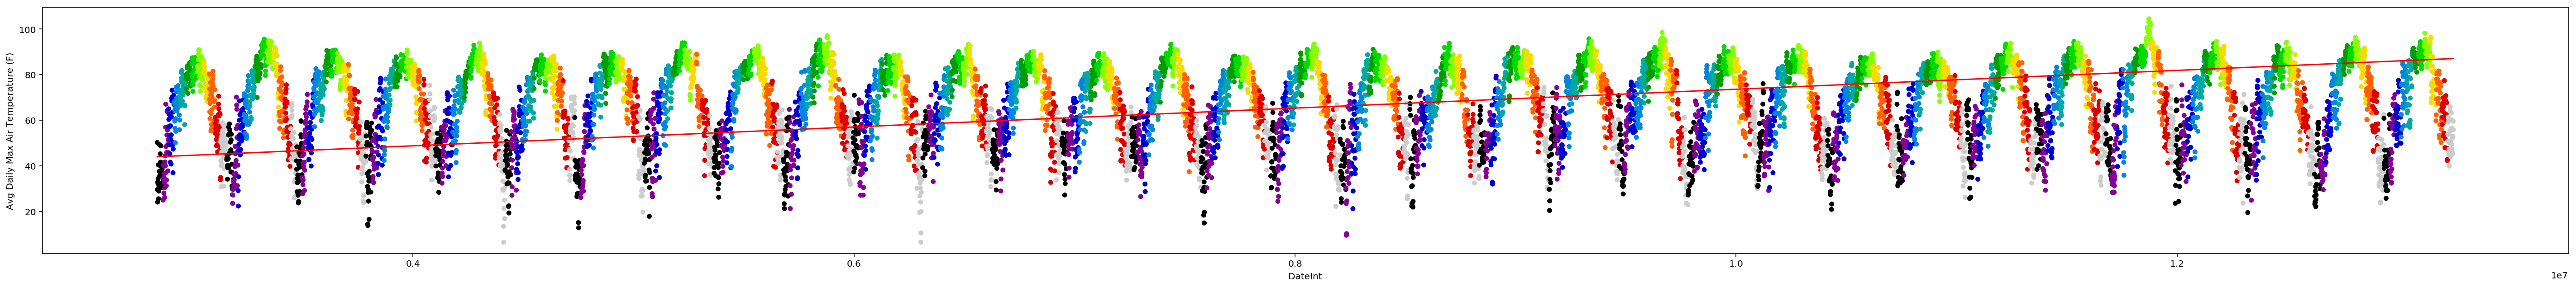

In [24]:
df.plot.scatter(x = 'DateInt', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5), c=df['color']);
#df.plot.scatter(x='DateInt', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize(50,5))
plt.plot([min(df['DateInt'].values), max(df['DateInt'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

In [26]:
#The slope is positive which indicates an overall rise in average temperature over this period of ~33 years